In [1]:
from sdm.utils import set_project_wd
set_project_wd()

Current Working Directory: /Users/matthewwhittle/Data Science/shefflied-bats


In [2]:
from ipyleaflet import Map, GeoData, basemaps, LayersControl, basemap_to_tiles
import geopandas as gpd
import pandas as pd
import json
import pickle
import rioxarray as rxr
import xarray as xr

results_df = pickle.load(open("data/sdm_predictions/results.pkl", "rb"))
training_data_gdf = gpd.read_parquet(
    "data/sdm_predictions/training-occurrence-data.parquet"
) # type: gpd.GeoDataFrame
training_data_gdf = training_data_gdf.to_crs(4326)

evs = rxr.open_rasterio("data/sdm_predictions/evs.tif")

/var/folders/vm/9ws15vws62zgnr64rdr_ls5r0000gn/T/ipykernel_44655/1475522830.py:2: DeprecationWarning: GeoPandas is set to use PyGEOS over Shapely. PyGEOS support is deprecatedand will be removed in GeoPandas 1.0, released in the Q1 of 2024. Please migrate to Shapely 2.0 (https://geopandas.org/en/stable/docs/user_guide/pygeos_to_shapely.html).
  import geopandas as gpd


In [3]:
results_df

,latin_name,activity_type,occurrence,final_model,cv_models,cv_scores,n_presence,n_background,mean_cv_score,std_cv_score,folds,prediction_path
0,Pipistrellus pipistrellus,Foraging,climate_stats_wind_ann_avg \ 0 ...,"(StandardScaler(), MaxentModel(beta_hinge=1.5,...","[(StandardScaler(), MaxentModel(beta_hinge=1.5...","[0.506093301963091, 0.567915036333147, 0.96460...",894,7182,0.680,0.203,3,data/sdm_predictions/Pipistrellus pipistrellus...
1,Pipistrellus pipistrellus,Roost,climate_stats_wind_ann_avg \ 0 ...,"(StandardScaler(), MaxentModel(beta_hinge=1.5,...","[(StandardScaler(), MaxentModel(beta_hinge=1.5...","[0.760757344789357, 0.7882906894100924, 0.7570...",265,7312,0.769,0.014,3,data/sdm_predictions/Pipistrellus pipistrellus...
2,Pipistrellus pipistrellus,All,climate_stats_wind_ann_avg \ 0 ...,"(StandardScaler(), MaxentModel(beta_hinge=1.5,...","[(StandardScaler(), MaxentModel(beta_hinge=1.5...","[0.8286595394736842, 0.8966418714963347, 0.856...",1344,7138,0.860,0.028,3,data/sdm_predictions/Pipistrellus pipistrellus...
3,Pipistrellus pygmaeus,Foraging,climate_stats_wind_ann_avg \ 0 ...,"(StandardScaler(), MaxentModel(beta_hinge=1.5,...","[(StandardScaler(), MaxentModel(beta_hinge=1.5...","[0.7177765342286887, 0.6291304611558468, 0.698...",166,7305,0.682,0.038,3,data/sdm_predictions/Pipistrellus pygmaeus_For...
4,Pipistrellus pygmaeus,Roost,climate_stats_wind_ann_avg \ 0 ...,"(StandardScaler(), MaxentModel(beta_hinge=1.5,...","[(StandardScaler(), MaxentModel(beta_hinge=1.5...","[0.7104369794339399, 0.7275201750786486, 0.679...",49,7336,0.706,0.020,3,data/sdm_predictions/Pipistrellus pygmaeus_Roo...
5,Pipistrellus pygmaeus,All,climate_stats_wind_ann_avg \ 0 ...,"(StandardScaler(), MaxentModel(beta_hinge=1.5,...","[(StandardScaler(), MaxentModel(beta_hinge=1.5...","[0.6927427713976732, 0.8448243647234679, 0.832...",247,7293,0.790,0.069,3,data/sdm_predictions/Pipistrellus pygmaeus_All...
6,Plecotus auritus,Foraging,climate_stats_wind_ann_avg \ 0 ...,"(StandardScaler(), MaxentModel(beta_hinge=1.5,...","[(StandardScaler(), MaxentModel(beta_hinge=1.5...","[0.8294747259043205, 0.6750528961424184, 0.804...",47,7332,0.770,0.068,3,data/sdm_predictions/Plecotus auritus_Foraging...
7,Plecotus auritus,Roost,climate_stats_wind_ann_avg \ 0 ...,"(StandardScaler(), MaxentModel(beta_hinge=1.5,...","[(StandardScaler(), MaxentModel(beta_hinge=1.5...","[0.6380727805748518, 0.8213537699923839, 0.631...",118,7326,0.697,0.088,3,data/sdm_predictions/Plecotus auritus_Roost.tif
8,Plecotus auritus,All,climate_stats_wind_ann_avg \ 0 ...,"(StandardScaler(), MaxentModel(beta_hinge=1.5,...","[(StandardScaler(), MaxentModel(beta_hinge=1.5...","[0.6563724467320489, 0.8015179316096747, 0.665...",182,7310,0.708,0.066,3,data/sdm_predictions/Plecotus auritus_All.tif
9,Myotis mystacinus,Foraging,climate_stats_wind_ann_avg \ 0 ...,"(StandardScaler(), MaxentModel(beta_hinge=1.5,...","[(StandardScaler(), MaxentModel(beta_hinge=1.5...","[0.654611707917278, 0.7820741495731941, 0.7477...",19,7342,0.728,0.054,3,data/sdm_predictions/Myotis mystacinus_Foragin...


In [4]:
evs

<xarray.DataArray (band: 43, y: 563, x: 792)>
[19173528 values with dtype=float64]
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7 8 9 ... 35 36 37 38 39 40 41 42 43
  * x            (x) float64 4.039e+05 4.04e+05 4.041e+05 ... 4.83e+05 4.831e+05
  * y            (y) float64 3.705e+05 3.706e+05 ... 4.267e+05 4.268e+05
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      ('climate_stats_wind_ann_avg', 'dtm-100m_LIDAR_Composite_...

In [5]:
# calculate the median value for each band
evs.coords["band"] = list(evs.attrs["long_name"])
evs = evs.to_dataset(dim="band")

In [6]:
ev_df = evs.to_dataframe()
ev_df.drop("spatial_ref", axis=1, inplace=True)
ev_df.dropna(inplace=True)

ev_mins = ev_df.min()
ev_maxs = ev_df.max()
ev_medians = ev_df.median()


In [7]:
model = results_df.iloc[6].final_model

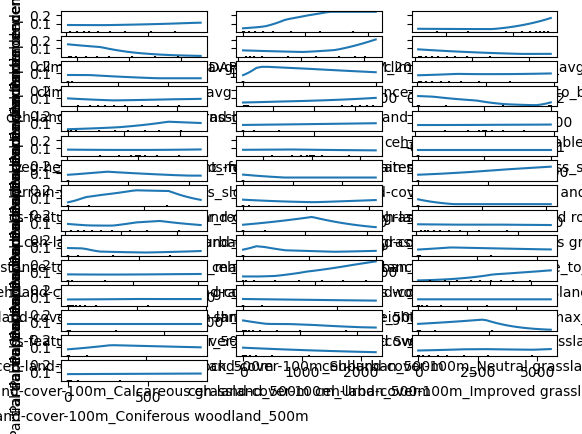

In [9]:
from sklearn.inspection import PartialDependenceDisplay

nrows = len(ev_df.columns)


display = PartialDependenceDisplay.from_estimator(
    model, ev_df.sample(500), ev_df.columns, grid_resolution=30, n_jobs=-1
)


In [10]:
display.feature_names

['climate_stats_wind_ann_avg',
 'dtm-100m_LIDAR_Composite_2m_DTM_2022_Elevation',
 'climate_stats_temp_ann_avg',
 'climate_stats_prec_ann_avg',
 'bioclim_bioclim_15',
 'os-distance-to-feature_distance_to_buildings',
 'ceh-land-cover-100m_Acid grassland',
 'ceh-land-cover-100m_Heather and shrub',
 'terrain-stats_slope',
 'terrain-stats_twi',
 'bioclim_bioclim_9',
 'ceh-land-cover-100m_Arable',
 'veg-height-100m_veg_height_max',
 'os-feature-cover-100m_water',
 'terrain-stats_aspect_northness_slope',
 'terrain-stats_aspect_eastness_slope',
 'terrain-stats_tpi',
 'ceh-land-cover-100m_Fen, Marsh and Swamp',
 'os-feature-cover-100m_major_roads',
 'ceh-land-cover-100m_Heather grassland',
 'ceh-land-cover-100m_Inland rock',
 'ceh-land-cover-100m_Suburban',
 'ceh-land-cover-100m_Neutral grassland',
 'ceh-land-cover-100m_Calcareous grassland',
 'os-distance-to-feature_distance_to_major_roads',
 'ceh-land-cover-100m_Urban',
 'os-distance-to-feature_distance_to_water',
 'ceh-land-cover-100m_Impro

In [11]:
# Convert the PD results to a dataframe
pd_results_df = pd.DataFrame(
    [
        {
            "feature": name,
            "values": result.grid_values[0],
            "average": result.average[0],
        } for result, name in zip(display.pd_results, display.feature_names)
    ]
)
pd_results_df = pd_results_df.explode(["values", "average"])


In [12]:
feature_influence= pd_results_df.groupby("feature")["average"].apply(lambda x: x.max() - x.min()).sort_values(ascending=False)

<Axes: ylabel='feature'>

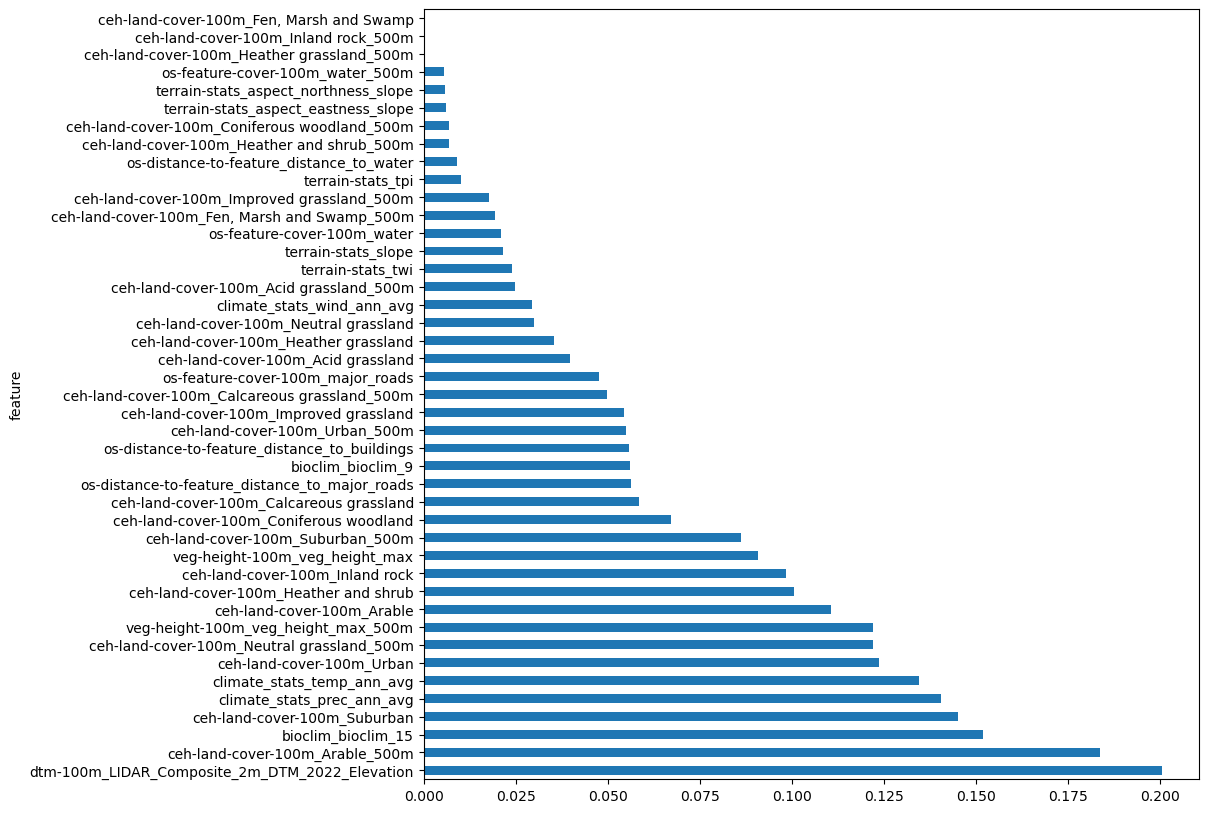

In [13]:
# Plot a horizontal bar chart of the feature influence
feature_influence.plot(kind="barh", figsize=(10, 10))

<Axes: xlabel='values'>

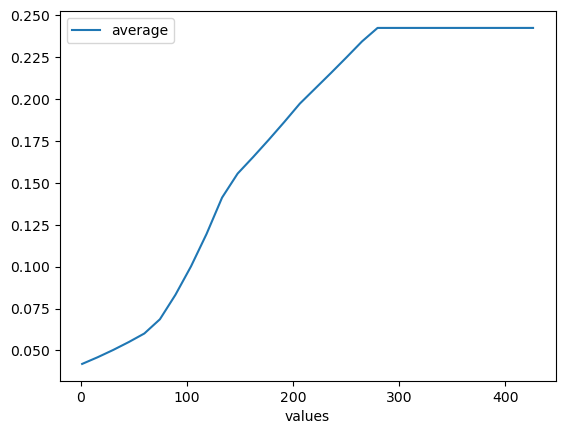

In [16]:
pd_results_df[pd_results_df.feature == "dtm-100m_LIDAR_Composite_2m_DTM_2022_Elevation"].plot(x="values", y="average")